# Step 1: Getting the region of interest

In [68]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [69]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)  # Creating a matrix of size like img
    # channel_count = img.shape[2]
    match_mask_color =  255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [70]:
image = cv2.imread("data/data_cv2/road.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [71]:
height = image.shape[0]
width = image.shape[1]

In [72]:
region_of_interest_vertices = [
    (400,height),
    (width/2, height/2),
    (width, height)]

In [73]:
# Converting to gray scale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [74]:
# Applying Canny Edge Detection
canny_image = cv2.Canny(gray_img, 100, 200)

In [75]:
cropped_image = region_of_interest(canny_image, 
                np.array([region_of_interest_vertices], np.int32))

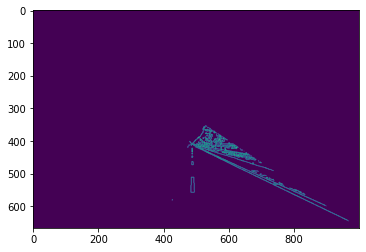

In [76]:
plt.imshow(cropped_image)
plt.show()

# Drawing Lines Using Hough Line Transform

In [82]:
def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3),
                         dtype = np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image,
                     (x1,y1), (x2,y2),
                     (0,255,0),
                     thickness = 3)
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

In [83]:
lines = cv2.HoughLinesP(cropped_image,
                        rho = 6, 
                        theta = np.pi/60,
                        threshold = 160,
                        lines = np.array([]),
                        minLineLength = 40,
                        maxLineGap = 25)

In [84]:
image_with_lines = draw_the_lines(image, lines)
cv2.imshow("image",image_with_lines)
cv2.waitKey(0)
cv2.destroyAllWindows()